# 📊 Project Overview
This project explores the lifestyle and health factors associated with sleep disorders such as Insomnia and Sleep Apnea. The dataset contains 400 synthetic records and 13 variables, covering a wide range of metrics related to sleep health, daily habits, and cardiovascular indicators.

# 🔍 Objective
The primary goal is to uncover meaningful relationships between sleep disorders and various lifestyle factors, including stress levels, physical activity, BMI, heart rate, and daily step count. By identifying patterns and correlations, the analysis aims to support a better understanding of how daily routines and health metrics impact sleep quality and the likelihood of developing sleep-related conditions.

# 🧾 Key Dataset Features
The dataset includes the following categories:

- Demographics: Gender, Age, Occupation

- Sleep Metrics: Sleep Duration (hours), Quality of Sleep (1–10 scale)

- Lifestyle Factors: Physical Activity (minutes/day), Stress Level (1–10 scale), Daily Steps

- Health Indicators: BMI Category, Blood Pressure (systolic/diastolic), Heart Rate (bpm)

- Sleep Disorder Diagnosis: None, Insomnia, or Sleep Apnea

This structured dataset provides a valuable foundation for both descriptive and predictive analysis, enabling data-driven insights into how lifestyle adjustments may help reduce sleep disturbances.

# 📥 Imports and Data Collection
To begin the analysis, we first import the necessary Python libraries and load the dataset into a pandas DataFrame. These libraries support data manipulation, visualization, and basic statistical exploration.

In [161]:
# Data manipulation and analysis

import pandas as pd 
import numpy as np

#Data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Statistical analysis

from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import pearsonr

# 📊 Data Analysis

In [114]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head() #method is a quick and simple way to preview the first few rows of your dataset.

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [115]:
df.tail() #method is a quick and simple way to preview the last few rows of your dataset.

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [116]:
df.info() # it gives us an overview of the dataset structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


## 🧾 Data Summary
The dataset consists of 374 entries and 13 columns.

Most columns are complete, with 374 non-null values, except:

Sleep Disorder column has only 155 non-null values, which indicates substantial missing data in this target variable.

Data types:

Categorical variables (object): Gender, Occupation, BMI Category, Blood Pressure, Sleep Disorder

Numerical variables (int64/float64): Age, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, Heart Rate, Daily Steps

In [117]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna("None")
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [118]:
df.describe() #.describe() method provides summary statistics for each numerical column in our dataset

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## 📊 General Observations
1. Age
Average age: 42.18

Minimum: 27, Maximum: 59

Median: 43
→ This indicates that most participants are between the ages of 30-50.

2. Sleep Duration (Hours)
Average: 7.13 hours

Minimum: 5.8 hours

Maximum: 8.5 hours

Standard deviation: 0.8
→ The distribution of sleep duration is quite narrow; most people sleep between 6–8 hours.

3. Quality of Sleep (Average: 7.31 /10)

Minimum: 4

Maximum: 9
→ Sleep quality is generally high, but there are a few low scores.

In [119]:
df.head(100)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None
96,97,Female,36,Accountant,7.2,8,60,4,Normal,115/75,68,7000,None
97,98,Female,36,Accountant,7.1,8,60,4,Normal,115/75,68,7000,None
98,99,Female,36,Teacher,7.1,8,60,4,Normal,115/75,68,7000,None


## Descriptive Analysis Questions
| Category                     | 🧠Analysis Questions                                                                 |
|-----------------------------|--------------------------------------------------------------------------------------|
| Demographic Insights         | 1.What is the gender distribution in the dataset?                                    |
|                             | 2.What is the age distribution of individuals?                                       |
|                             | 3.Which occupations are most common among participants?                              |
|                             | 4.Is there a noticeable difference in sleep duration or quality between occupations?  |
| Sleep Patterns               | 5.What is the average sleep duration and sleep quality across the dataset?           |
|                             | 6.How do sleep duration and quality vary by gender or age group?                     |
|                             | 7.Are there individuals who sleep significantly less (<6h) or more (>8h)?            |
| Lifestyle Factors            | 8.What is the average stress level and physical activity per day?                    |
|                             | 9.Is there a relationship between stress level and sleep quality?                    |
|                             | 10.How does physical activity relate to sleep duration?                               |
|                             | 11.What is the distribution of BMI categories in the dataset?                         |
| Cardiovascular & Activity    | 12.What are the average heart rate and daily step counts?                            |
|                             | 13.Is there a difference in heart rate or steps among different BMI categories?       |
|                             | 14.How do daily steps relate to physical activity level (minutes/day)?                |
| Sleep Disorder Analysis      | 15.What proportion of individuals have sleep disorders?                              |
|                             | 16.How do stress level, heart rate, and physical activity differ by disorder type?    |
|                             | 17.What lifestyle patterns are common in Insomnia or Sleep Apnea cases?              |
|                             | 18.Do sleep disorders correlate with lower sleep quality or shorter duration?         |
| Advanced Exploration         | 19.What are the strongest correlations between sleep and lifestyle factors?          |
|                             | 20.Are there outliers in heart rate, stress, or sleep duration? What do they reveal? |




In [120]:
#1.What is the gender distribution in the dataset?  
gender_distibution = df['Gender'].value_counts()
gender_distibution

Gender
Male      189
Female    185
Name: count, dtype: int64

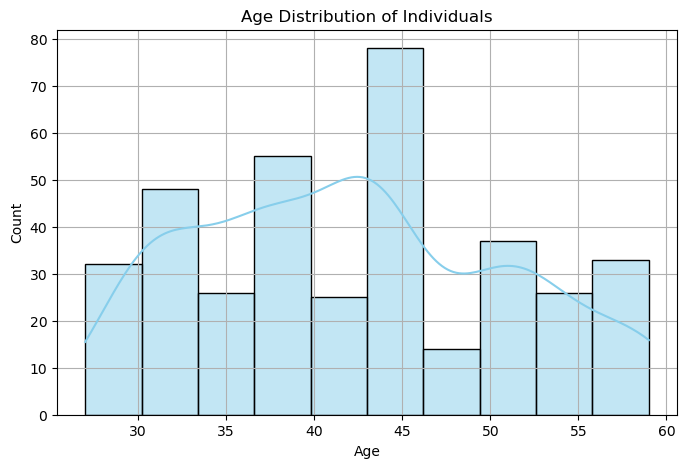

In [121]:
#2.What is the age distribution of individuals? 
# Plot the age distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue')
plt.title("Age Distribution of Individuals")
plt.xlabel("Age")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [122]:
#3.Which occupations are most common among participants?
occupation_counts = df['Occupation'].value_counts()
occupation_counts.head(10)

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Name: count, dtype: int64

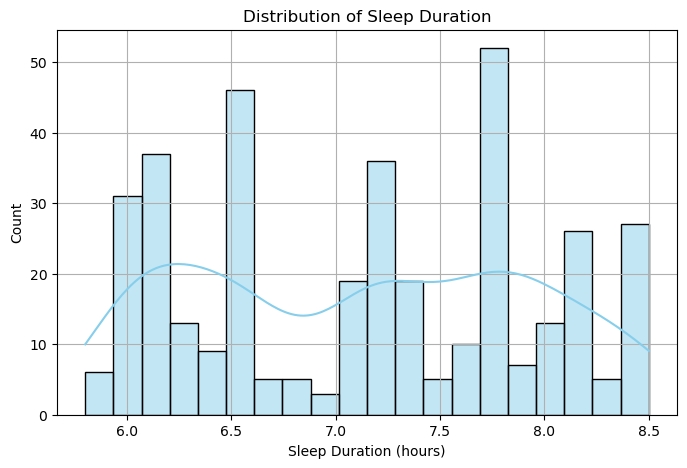

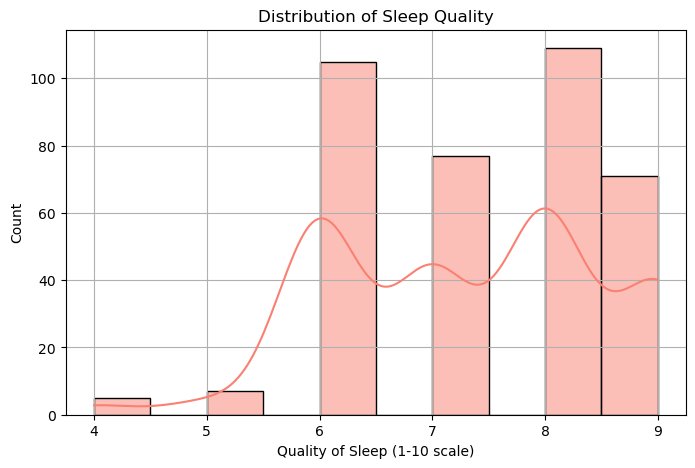

In [123]:
#4.Is there a difference in sleep duration or quality between occupations?

# Histogram of Sleep Duration
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Sleep Duration', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sleep Duration')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Histogram of Quality of Sleep
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Quality of Sleep', bins=10, kde=True, color='salmon')
plt.title('Distribution of Sleep Quality')
plt.xlabel('Quality of Sleep (1-10 scale)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [124]:
#5.What is the average sleep duration and sleep quality across the dataset?
average_sleep_duration = df['Sleep Duration'].mean()
average_sleep_quality = df['Quality of Sleep'].mean()

average_sleep_duration, average_sleep_quality

(7.132085561497325, 7.31283422459893)

In [125]:
#6.How do sleep duration and quality vary by gender or age group?
# Group by Gender
gender_grouped = df.groupby('Gender')[['Sleep Duration', 'Quality of Sleep']].mean().round(2)

# Create Age Groups
bins = [18, 28, 38, 48, 58, 68]
labels = ['18-27', '28-37', '38-47', '48-57', '58-67']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group
age_grouped = df.groupby('Age Group')[['Sleep Duration', 'Quality of Sleep']].mean().round(2)

gender_grouped, age_grouped


(        Sleep Duration  Quality of Sleep
 Gender                                  
 Female            7.23              7.66
 Male              7.04              6.97,
            Sleep Duration  Quality of Sleep
 Age Group                                  
 18-27                6.10              6.00
 28-37                6.94              6.82
 38-47                7.02              7.25
 48-57                7.35              7.70
 58-67                8.07              9.00)

✅ By Gender
Females report both longer sleep duration and better sleep quality than males.

✅ By Age Group
Sleep duration and quality both improve with age, peaking in the 58–67 age range:

8.07 hours of sleep

9.00 / 10 sleep quality

In [126]:
#7.Are there individuals who sleep significantly less (<6h) or more (>8h)?
#  
sleep_less_than_6 = df[df['Sleep Duration'] < 6]
sleep_more_than_8 = df[df['Sleep Duration'] > 8]

# Count them
count_less_than_6 = sleep_less_than_6.shape[0]
count_more_than_8 = sleep_more_than_8.shape[0]

count_less_than_6, count_more_than_8

(6, 58)

- 6 individuals sleep less than 6 hours
- 58 individuals sleep more than 8 hours

In [127]:
#8.What is the average stress level and physical activity per day? 
average_stress = df['Stress Level'].mean().round(2)
average_activity = df['Physical Activity Level'].mean().round(2)

average_stress, average_activity

(5.39, 59.17)

They are engaging in just under 1 hour of daily physical activity, which is a healthy habit and aligns with global recommendations for maintaining well-being

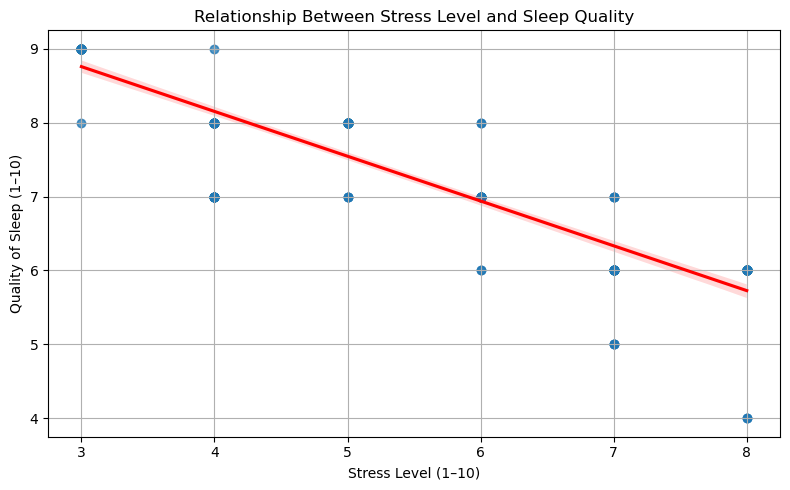

-0.9

In [128]:
#9.Is there a relationship between stress level and sleep quality?

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Stress Level', y='Quality of Sleep', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship Between Stress Level and Sleep Quality")
plt.xlabel("Stress Level (1–10)")
plt.ylabel("Quality of Sleep (1–10)")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df['Stress Level'].corr(df['Quality of Sleep']).round(2)
correlation

📉 As stress level increases, sleep quality tends to decrease.

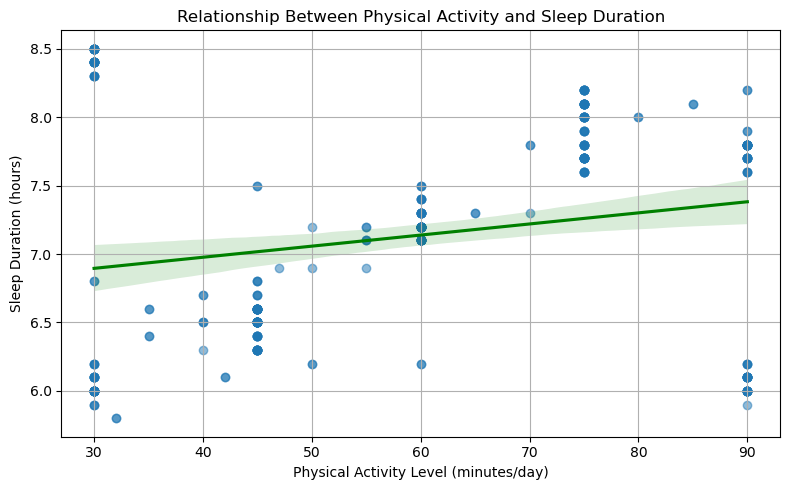

0.21

In [129]:
#10.How does physical activity relate to sleep duration?  

plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Physical Activity Level', y='Sleep Duration', scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title("Relationship Between Physical Activity and Sleep Duration")
plt.xlabel("Physical Activity Level (minutes/day)")
plt.ylabel("Sleep Duration (hours)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
activity_sleep_corr = df['Physical Activity Level'].corr(df['Sleep Duration']).round(2)
activity_sleep_corr



Daily movement not only boosts physical health, but also improves sleep patterns.

In [130]:
#11.What is the distribution of BMI categories in the dataset?    


In [131]:
df['BMI Category'] = df['BMI Category'].replace({'Normal Weight': 'Normal'})

df['BMI Category'].value_counts()

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\4061186976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_distribution.index, y=bmi_distribution.values, palette='pastel')


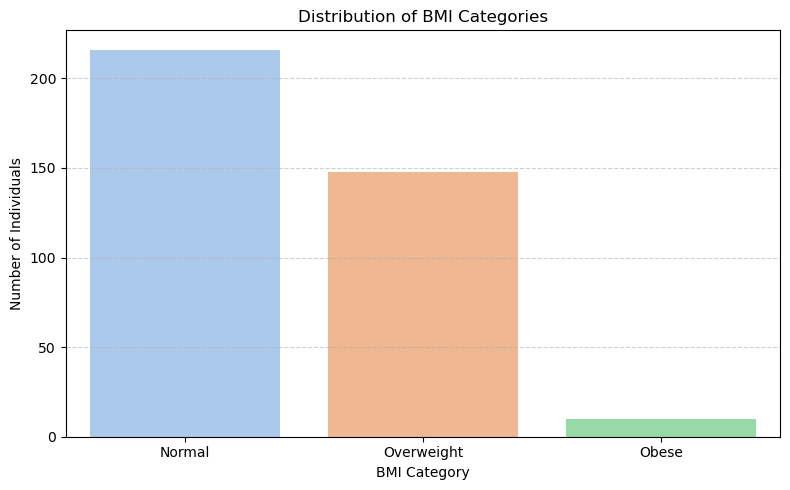

BMI Category
Normal        216
Overweight    148
Obese          10
Name: count, dtype: int64

In [132]:
bmi_distribution = df['BMI Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=bmi_distribution.index, y=bmi_distribution.values, palette='pastel')
plt.title("Distribution of BMI Categories")
plt.xlabel("BMI Category")
plt.ylabel("Number of Individuals")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display exact counts
bmi_distribution

In [133]:
#12.What are the average heart rate and daily step counts? 
 
average_heart_rate = df['Heart Rate'].mean().round(2)
average_daily_steps = df['Daily Steps'].mean().round(2)

average_heart_rate, average_daily_steps

(70.17, 6816.84)

✅ Heart Rate is in the healthy range (60–100 bpm).

🚶 Step count is moderately high — many people aim for ~7000 steps/day, so this group is fairly active overall.

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\2340956589.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_grouped.index, y=bmi_grouped['Heart Rate'], palette='coolwarm')


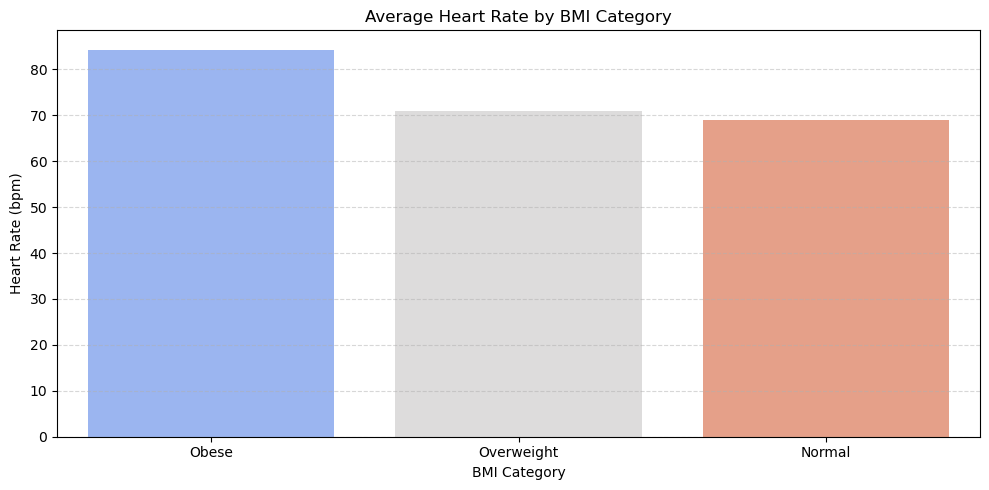

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\2340956589.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_grouped.index, y=bmi_grouped['Daily Steps'], palette='crest')


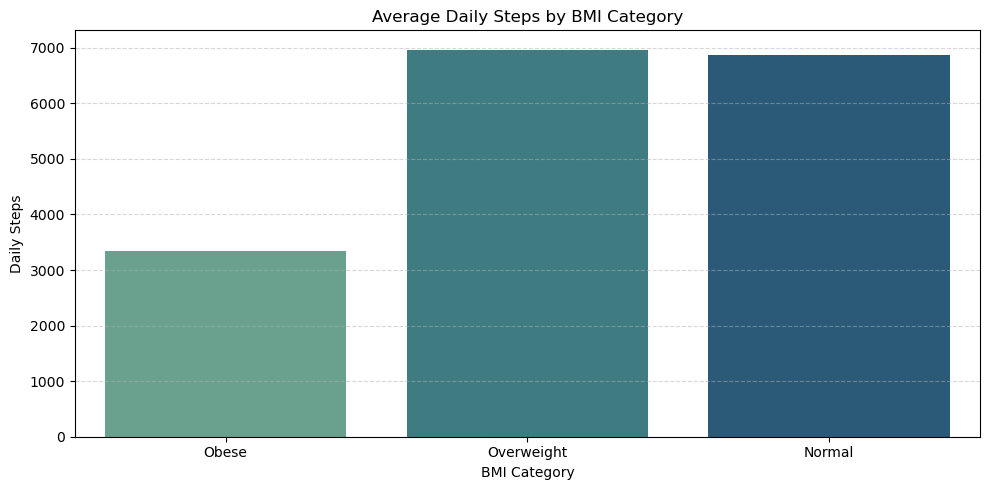

,Heart Rate,Daily Steps
BMI Category,,
Obese,84.30,3350.00
Overweight,70.95,6965.54
Normal,68.98,6875.46


In [134]:
# 13.Is there a difference in heart rate or steps among different BMI categories?

# Group by BMI Category and calculate average heart rate and daily steps
bmi_grouped = df.groupby('BMI Category')[['Heart Rate', 'Daily Steps']].mean().round(2)

# Sort for cleaner plot order
bmi_grouped = bmi_grouped.sort_values(by='Heart Rate', ascending=False)

# Barplot for Heart Rate
plt.figure(figsize=(10, 5))
sns.barplot(x=bmi_grouped.index, y=bmi_grouped['Heart Rate'], palette='coolwarm')
plt.title("Average Heart Rate by BMI Category")
plt.ylabel("Heart Rate (bpm)")
plt.xlabel("BMI Category")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Barplot for Daily Steps
plt.figure(figsize=(10, 5))
sns.barplot(x=bmi_grouped.index, y=bmi_grouped['Daily Steps'], palette='crest')
plt.title("Average Daily Steps by BMI Category")
plt.ylabel("Daily Steps")
plt.xlabel("BMI Category")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Display grouped values
bmi_grouped

💓 Heart Rate
Obese individuals have the highest average heart rate: 84.3 bpm

Overweight: 70.95 bpm

Normal: 68.98 bpm
🔍 This indicates a clear increase in heart strain as BMI increases.

🚶‍♀️ Daily Steps
Obese: ~3,350 steps/day

Overweight: ~6,965 steps/day

Normal: ~6,875 steps/day
🔍 People with obesity walk less than half as much as those in the Normal or Overweight group.

🧠 Insights:
There's a reverse pattern between physical activity and BMI.

Lower activity and higher heart rate are clear markers for individuals in higher BMI categories.

This may help you suggest targeted interventions (e.g., promoting walking routines for high-BMI individuals).

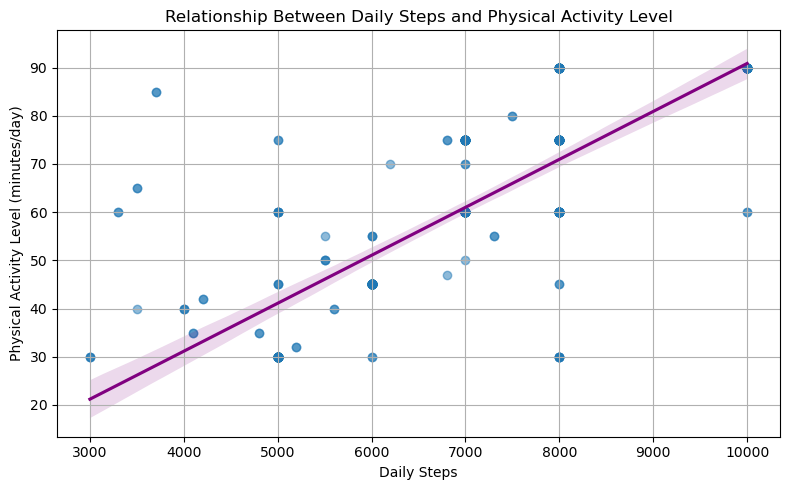

0.77

In [135]:
#14.How do daily steps relate to physical activity level (minutes/day)?

# Scatterplot with regression line for Daily Steps vs. Physical Activity Level
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Daily Steps', y='Physical Activity Level', scatter_kws={'alpha':0.5}, line_kws={'color':'purple'})
plt.title("Relationship Between Daily Steps and Physical Activity Level")
plt.xlabel("Daily Steps")
plt.ylabel("Physical Activity Level (minutes/day)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation between the two
steps_activity_corr = df['Daily Steps'].corr(df['Physical Activity Level']).round(2)
steps_activity_corr

📈 There’s a strong positive relationship — as daily steps increase, so does minutes of physical activity per day.

The purple regression line confirms a linear trend: more walking = more activity time.

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\3548885517.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sleep_disorder_counts.index, y=sleep_disorder_counts.values, palette='Set2')


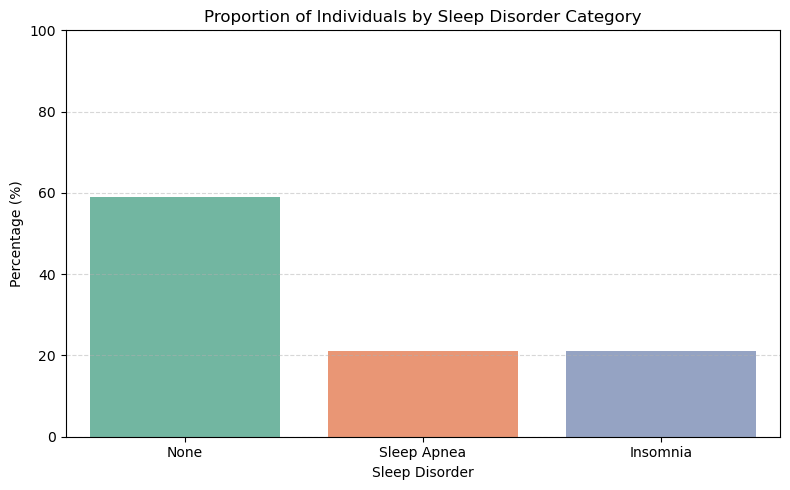

Sleep Disorder
None           59.0
Sleep Apnea    21.0
Insomnia       21.0
Name: proportion, dtype: float64

In [136]:
# 15.What proportion of individuals have sleep disorders?  

# Calculate the proportion of individuals with each sleep disorder category
sleep_disorder_counts = df['Sleep Disorder'].value_counts(normalize=True).round(2) * 100

# Bar plot of the proportions
plt.figure(figsize=(8, 5))
sns.barplot(x=sleep_disorder_counts.index, y=sleep_disorder_counts.values, palette='Set2')
plt.title("Proportion of Individuals by Sleep Disorder Category")
plt.ylabel("Percentage (%)")
plt.xlabel("Sleep Disorder")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Show numeric percentages
sleep_disorder_counts

In [137]:
#16.How do stress level, heart rate, and physical activity differ by disorder type? 

disorder_grouped = df.groupby('Sleep Disorder')[['Stress Level', 'Heart Rate', 'Physical Activity Level']].mean().round(2)

# Display the results
disorder_grouped

,Stress Level,Heart Rate,Physical Activity Level
Sleep Disorder,,,
Insomnia,5.87,70.47,46.82
None,5.11,69.02,57.95
Sleep Apnea,5.67,73.09,74.79


🔍 Interpretation:
Stress Level is highest for individuals with Insomnia.

Heart Rate peaks in individuals with Sleep Apnea, suggesting possible cardiovascular strain.

Physical Activity is surprisingly highest in the Sleep Apnea group — this may suggest that some are managing the condition with active lifestyle interventions.

In [138]:
#17.What lifestyle patterns are common in Insomnia or Sleep Apnea cases?  

# Filter the dataset to only include individuals with Insomnia or Sleep Apnea
disorder_cases = df[df['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]

# Calculate the average values of relevant lifestyle variables
lifestyle_columns = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate', 'Physical Activity Level', 'Daily Steps']
lifestyle_patterns = disorder_cases.groupby('Sleep Disorder')[lifestyle_columns].mean().round(2)

# Display the results
lifestyle_patterns

,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Physical Activity Level,Daily Steps
Sleep Disorder,,,,,,
Insomnia,6.59,6.53,5.87,70.47,46.82,5901.30
Sleep Apnea,7.03,7.21,5.67,73.09,74.79,7619.23


🧠 Insight:
- Insomnia appears more connected to mental stress and restlessness (low sleep time + low activity).

- Sleep Apnea may reflect physiological issues (e.g., poor breathing during sleep), but the individuals might be trying to manage it with higher activity.

In [139]:
#18.Do sleep disorders correlate with lower sleep quality or shorter duration?

# Group by Sleep Disorder and calculate average sleep duration and quality
sleep_metrics_by_disorder = df.groupby('Sleep Disorder')[['Sleep Duration', 'Quality of Sleep']].mean().round(2)

# Display the result
sleep_metrics_by_disorder

,Sleep Duration,Quality of Sleep
Sleep Disorder,,
Insomnia,6.59,6.53
None,7.36,7.63
Sleep Apnea,7.03,7.21


C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\4082668162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sleep Disorder', y='Sleep Duration', ax=axes[0], palette='Blues')
C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\4082668162.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Sleep Disorder', y='Quality of Sleep', ax=axes[1], palette='Purples')


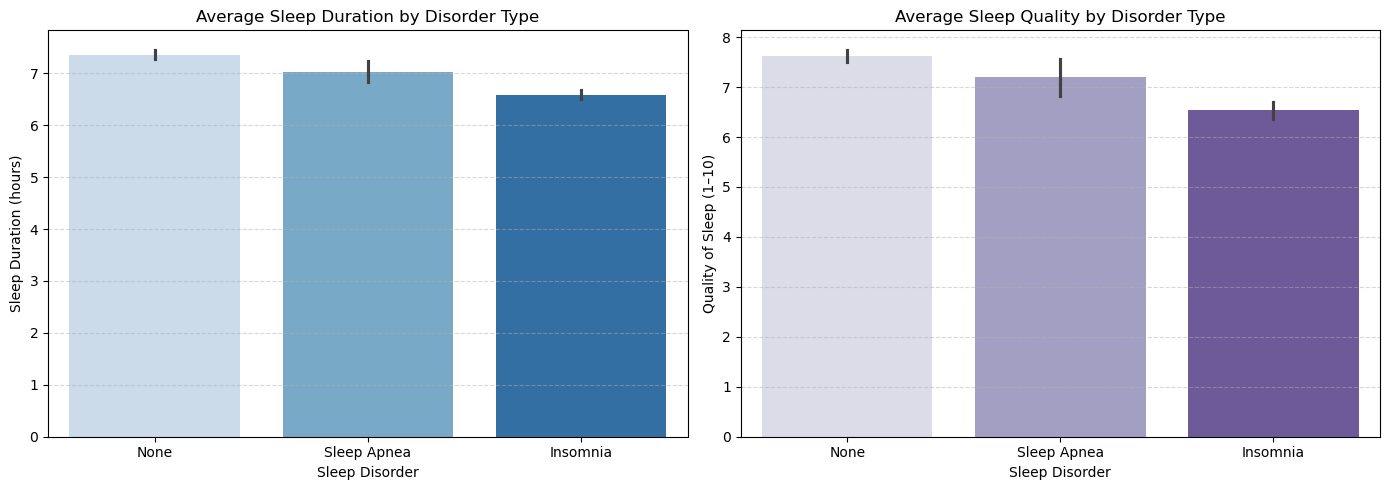

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot for Sleep Duration
sns.barplot(data=df, x='Sleep Disorder', y='Sleep Duration', ax=axes[0], palette='Blues')
axes[0].set_title('Average Sleep Duration by Disorder Type')
axes[0].set_ylabel('Sleep Duration (hours)')
axes[0].set_xlabel('Sleep Disorder')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Bar plot for Quality of Sleep
sns.barplot(data=df, x='Sleep Disorder', y='Quality of Sleep', ax=axes[1], palette='Purples')
axes[1].set_title('Average Sleep Quality by Disorder Type')
axes[1].set_ylabel('Quality of Sleep (1–10)')
axes[1].set_xlabel('Sleep Disorder')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

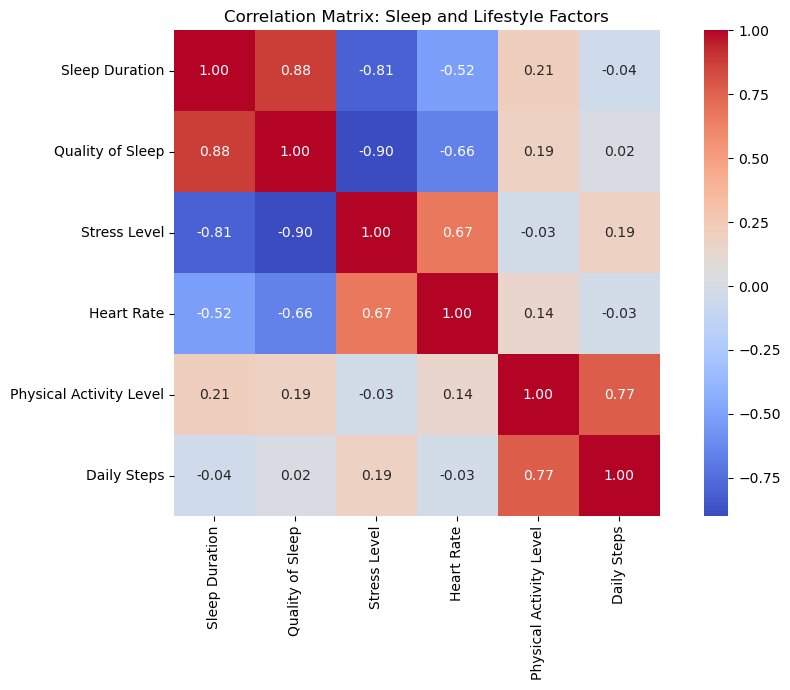

,Sleep Duration,Quality of Sleep,Stress Level,Heart Rate,Physical Activity Level,Daily Steps
Sleep Duration,1.00,0.88,-0.81,-0.52,0.21,-0.04
Quality of Sleep,0.88,1.00,-0.90,-0.66,0.19,0.02
Stress Level,-0.81,-0.90,1.00,0.67,-0.03,0.19
Heart Rate,-0.52,-0.66,0.67,1.00,0.14,-0.03
Physical Activity Level,0.21,0.19,-0.03,0.14,1.00,0.77
Daily Steps,-0.04,0.02,0.19,-0.03,0.77,1.00


In [141]:
#19.What are the strongest correlations between sleep and lifestyle factors?

#
# Select relevant numeric columns related to sleep and lifestyle
relevant_columns = [
    'Sleep Duration', 'Quality of Sleep', 'Stress Level', 'Heart Rate',
    'Physical Activity Level', 'Daily Steps'
]

# Compute correlation matrix
correlation_matrix = df[relevant_columns].corr().round(2)

# Visualize with heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix: Sleep and Lifestyle Factors")
plt.tight_layout()
plt.show()

# Display correlation matrix
correlation_matrix

🧠 Key Takeaways:
Stress has the strongest negative impact on both sleep quality and duration.

More physical activity (steps + minutes) doesn’t directly improve sleep much, but they're highly aligned with each other.

A higher heart rate may signal physiological stress, which can affect sleep quality — especially relevant for conditions like Sleep Apnea.

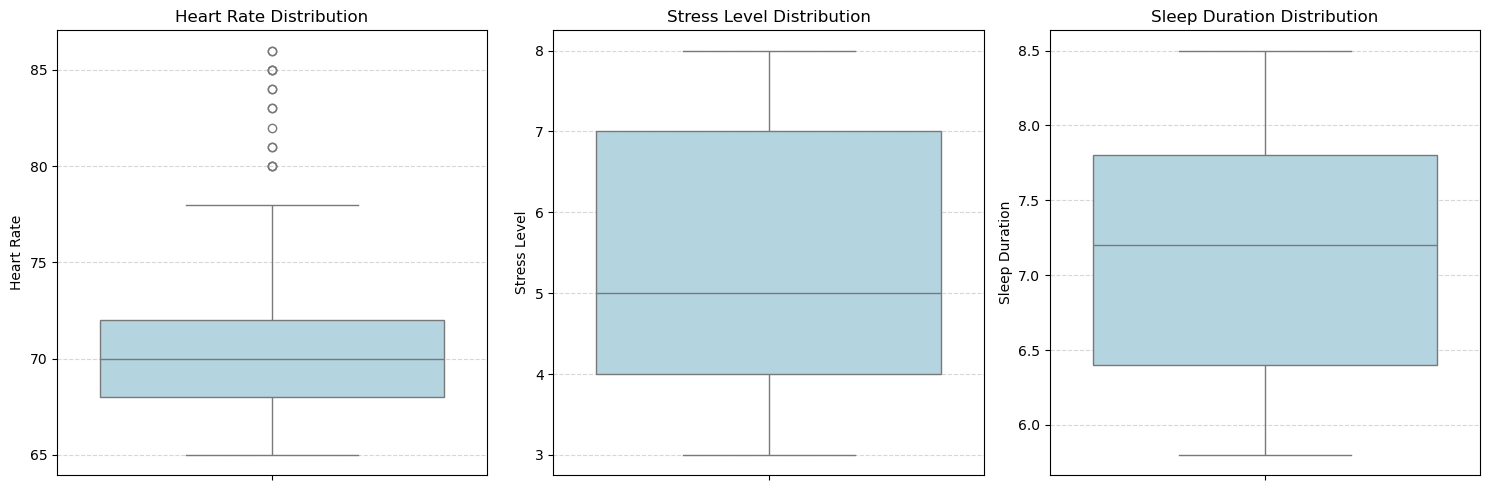

,Heart Rate,Stress Level,Sleep Duration
count,374.00,374.00,374.00
mean,70.17,5.39,7.13
std,4.14,1.77,0.80
min,65.00,3.00,5.80
25%,68.00,4.00,6.40
50%,70.00,5.00,7.20
75%,72.00,7.00,7.80
max,86.00,8.00,8.50


In [142]:
#20.Are there outliers in heart rate, stress, or sleep duration? What do they reveal?

# Create 3 boxplots for Heart Rate, Stress Level, and Sleep Duration
plt.figure(figsize=(15, 5))
for i, column in enumerate(['Heart Rate', 'Stress Level', 'Sleep Duration']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, y=column, color='lightblue')
    plt.title(f'{column} Distribution')
    plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Show summary statistics for outlier interpretation
df[['Heart Rate', 'Stress Level', 'Sleep Duration']].describe().round(2)

💓 Heart Rate:
Outliers detected above ~78 bpm (see circles in the leftmost boxplot).

Max = 86 bpm, while 75th percentile = 72 bpm → suggests a few individuals may have unusually high resting heart rates.

🧠 Insight: These outliers could reflect cardiovascular stress, perhaps linked to Sleep Apnea or anxiety.

😰 Stress Level:
No strong outliers visually — distribution is symmetric between 3 and 8.

50% of people fall between 4 and 7.

🧠 Insight: Stress is consistently spread, but not extreme in most cases.

🛌 Sleep Duration:
Fairly normal distribution; no extreme outliers.

Range = 5.8 to 8.5 hours, which fits expected sleep needs.

🧠 Insight: Most participants sleep within a healthy range, but those closer to the edges may be at risk of sleep deprivation or oversleeping.

# 💤 Conclusion: Insights from Sleep and Lifestyle Patterns

This analysis explored how various lifestyle factors—such as physical activity, stress levels, and cardiovascular metrics—relate to sleep health, with particular attention to sleep disorders like Insomnia and Sleep Apnea. Key findings are outlined below:

🔹 Sleep Disorders and Sleep Health
Individuals with Insomnia have the shortest sleep duration (6.59 hrs) and lowest sleep quality (6.53/10).

Those with Sleep Apnea experience moderately lower sleep quality and slightly reduced duration compared to those without any disorder.

Sleep disorders are strongly associated with lower sleep quality and shorter sleep duration overall.

🔹 Stress as a Key Driver
Stress Level is the strongest negative correlate of both sleep quality (−0.90) and sleep duration (−0.81).

Elevated stress also links with higher heart rate (r = +0.67), reflecting a compounding effect on physiological strain.

🔹 Lifestyle Behaviors
More daily steps are strongly associated with more physical activity time (r = +0.77), confirming expected movement patterns.

However, physical activity had only a weak direct correlation with sleep quality or duration, suggesting that mental stress plays a larger role in sleep health than activity level alone.

🔹 Heart Rate and Sleep
Individuals with higher heart rates tend to report poorer sleep (Quality of Sleep r = −0.66).

Heart rate outliers (>78 bpm) may signal potential sleep-related or cardiovascular conditions, such as Sleep Apnea.

🔹 Outlier Insights
Outliers were found primarily in heart rate, possibly indicating underlying health risks.

Stress level and sleep duration showed relatively stable distributions, with no extreme cases, suggesting generally balanced lifestyle habits in the sample population.

📌 Final Takeaway
Mental stress is the most influential factor affecting sleep health, outweighing physical activity in both sleep quality and duration. Interventions aiming to improve sleep outcomes should focus not only on promoting exercise but also on reducing stress levels and managing cardiovascular strain.

## Inferential Analysis Questions

| Category                  | 🔬 Analysis Questions                                                                                       |
|---------------------------|-------------------------------------------------------------------------------------------------------------|
| Sleep Disorders           | 1. Do individuals with sleep disorders sleep significantly fewer hours than those without disorders?       |
|                           | 2. Are heart rates significantly higher in Sleep Apnea cases than in those without sleep disorders?         |
|                           | 3. Do individuals with sleep disorders walk fewer steps on average?                                        |
|                           | 4. Is the proportion of Insomnia cases different across genders?                                            |
| Stress and Mental Health  | 5. Does stress level significantly predict sleep quality or sleep duration?                                |
|                           | 6. Is there a significant difference in stress level between occupations?                                   |
| Lifestyle and Activity    | 7. Is there a significant correlation between physical activity and sleep duration?                         |
|                           | 8. Is there a difference in sleep quality between genders?                                                  |


In [143]:
#1. Do individuals with sleep disorders sleep significantly fewer hours than those without disorders?
# Create binary group: Has Disorder vs None
df_disorder = df[df['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]
df_none = df[df['Sleep Disorder'] == 'None']

# Perform t-test
t_stat, p_value = ttest_ind(df_disorder['Sleep Duration'], df_none['Sleep Duration'], equal_var=False)

# Output results
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("✅ Statistically significant difference in sleep duration.")
else:
    print("❌ No statistically significant difference in sleep duration.")

T-statistic: -6.876
P-value: 0.0
✅ Statistically significant difference in sleep duration.


📌 Form Hypotheses

Null Hypothesis (H₀): There is no significant difference in sleep duration between individuals with and without sleep disorders.

Alternative Hypothesis (H₁): Individuals with sleep disorders sleep significantly fewer hours than those without.

In [144]:
print("Mean (With Disorder):", df_disorder['Sleep Duration'].mean())
print("Mean (No Disorder):", df_none['Sleep Duration'].mean())


Mean (With Disorder): 6.812258064516129
Mean (No Disorder): 7.358447488584476


There is a statistically significant difference in sleep duration between the two groups.

Individuals with sleep disorders (Insomnia or Sleep Apnea) sleep significantly fewer hours on average than those without any disorder.

This supports the conclusion that sleep disorders have a real impact on reducing total sleep time.

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\1727693422.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_sleep_df, x="Group", y="Average Sleep Duration", palette="pastel")


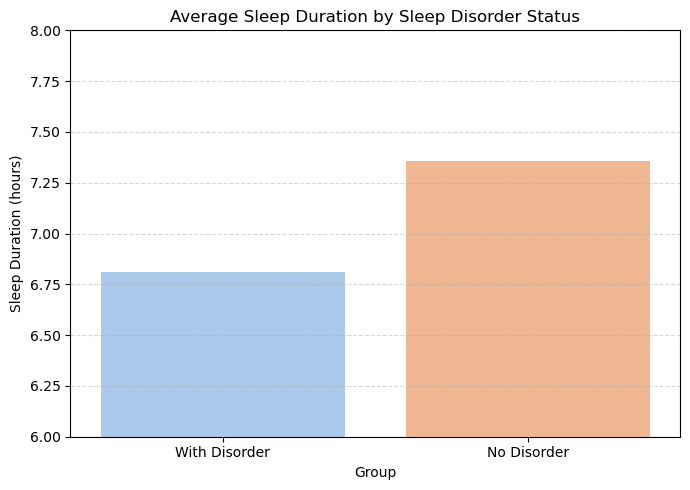

In [145]:
# Create binary group: Has Disorder vs None
df_disorder = df[df['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]
df_none = df[df['Sleep Disorder'] == 'None']

# Prepare data
avg_sleep = {
    "With Disorder": df_disorder['Sleep Duration'].mean(),
    "No Disorder": df_none['Sleep Duration'].mean()
}

# Convert to DataFrame for plotting
avg_sleep_df = pd.DataFrame(list(avg_sleep.items()), columns=["Group", "Average Sleep Duration"])

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=avg_sleep_df, x="Group", y="Average Sleep Duration", palette="pastel")
plt.title("Average Sleep Duration by Sleep Disorder Status")
plt.ylabel("Sleep Duration (hours)")
plt.ylim(6, 8)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [146]:
#2. Are heart rates significantly higher in Sleep Apnea cases than in those without sleep disorders?

📌Hypotheses

Null Hypothesis (H₀): There is no significant difference in heart rate between individuals with Sleep Apnea and those with no sleep disorder.

Alternative Hypothesis (H₁): Individuals with Sleep Apnea have significantly higher heart rates.

In [147]:
# Create two groups
apnea_group = df[df['Sleep Disorder'] == 'Sleep Apnea']
no_disorder_group = df[df['Sleep Disorder'] == 'None']
# Perform t-test
t_stat, p_value = ttest_ind(apnea_group['Heart Rate'], no_disorder_group['Heart Rate'], equal_var=False)

# Print results
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("✅ Statistically significant difference in heart rate.")
else:
    print("❌ No statistically significant difference in heart rate.")

# Compare means
print("Mean (Sleep Apnea):", apnea_group['Heart Rate'].mean())
print("Mean (No Disorder):", no_disorder_group['Heart Rate'].mean())

T-statistic: 6.712
P-value: 0.0
✅ Statistically significant difference in heart rate.
Mean (Sleep Apnea): 73.08974358974359
Mean (No Disorder): 69.01826484018265


Individuals with Sleep Apnea have a significantly higher average heart rate than those without any sleep disorder.

This supports known medical patterns: Sleep Apnea causes intermittent breathing pauses, leading to oxygen desaturation and cardiovascular strain, which elevates resting heart rate.

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\2288270130.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_heart_df, x="Group", y="Average Heart Rate", palette="coolwarm")


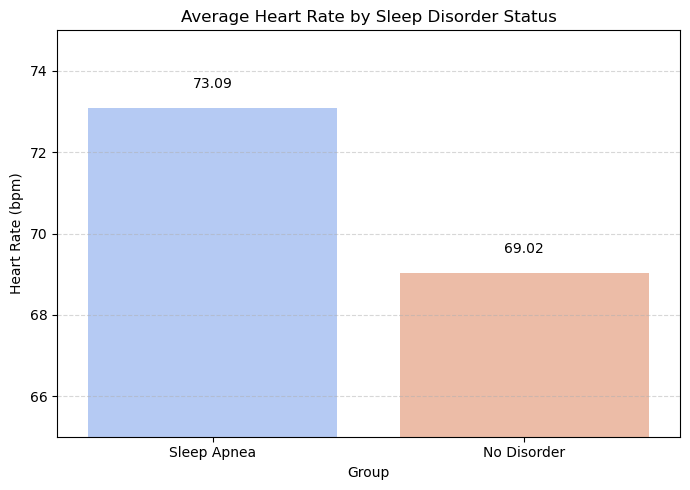

In [148]:
# Create a bar chart comparing average heart rate for those with Sleep Apnea vs. No Disorder

# Prepare data
avg_heart_rate = {
    "Sleep Apnea": apnea_group['Heart Rate'].mean(),
    "No Disorder": no_disorder_group['Heart Rate'].mean()
}

# Convert to DataFrame for plotting
avg_heart_df = pd.DataFrame(list(avg_heart_rate.items()), columns=["Group", "Average Heart Rate"])

# Plot bar chart
plt.figure(figsize=(7, 5))
sns.barplot(data=avg_heart_df, x="Group", y="Average Heart Rate", palette="coolwarm")
plt.title("Average Heart Rate by Sleep Disorder Status")
plt.ylabel("Heart Rate (bpm)")
plt.ylim(65, 75)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Annotate values
for index, row in avg_heart_df.iterrows():
    plt.text(index, row['Average Heart Rate'] + 0.5, f"{row['Average Heart Rate']:.2f}", ha='center')

plt.tight_layout()
plt.show()

📊 The visual gap clearly highlights a statistically significant elevation in heart rate for those with Sleep Apnea.

In [149]:
#3. Do individuals with sleep disorders walk fewer steps on average?


📌 Hypotheses:

Null Hypothesis (H₀): There is no significant difference in daily steps between individuals with sleep disorders and those without.

Alternative Hypothesis (H₁): Individuals with sleep disorders walk significantly fewer steps than those without.

In [150]:
# Create two groups
df_disorder = df[df['Sleep Disorder'].isin(['Insomnia', 'Sleep Apnea'])]
df_none = df[df['Sleep Disorder'] == 'None']

# Perform t-test on Daily Steps
t_stat, p_value = ttest_ind(df_disorder['Daily Steps'], df_none['Daily Steps'], equal_var=False)

# Print results
print("T-statistic:", round(t_stat, 3))
print("P-value:", round(p_value, 4))

# Interpretation
if p_value < 0.05:
    print("✅ Statistically significant difference in daily steps.")
else:
    print("❌ No statistically significant difference in daily steps.")

# Show group means
print("Mean (With Disorder):", df_disorder['Daily Steps'].mean())
print("Mean (No Disorder):", df_none['Daily Steps'].mean())

T-statistic: -0.487
P-value: 0.6265
❌ No statistically significant difference in daily steps.
Mean (With Disorder): 6765.806451612903
Mean (No Disorder): 6852.96803652968


Even though people with sleep disorders walked slightly fewer steps on average, this difference is not statistically significant.

Therefore, we cannot conclude that sleep disorders lead to reduced physical activity in terms of step count.

In [151]:
# 4.Is the proportion of Insomnia cases different across genders?    

📌 Hypotheses:

Null Hypothesis (H₀): Insomnia occurs equally across genders.

Alternative Hypothesis (H₁): Insomnia is disproportionately distributed between genders.

In [152]:
# Create a contingency table: Gender vs. Insomnia (Yes/No)
df['Is_Insomnia'] = df['Sleep Disorder'] == 'Insomnia'
contingency_table = pd.crosstab(df['Gender'], df['Is_Insomnia'])

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-square Statistic:", round(chi2, 3))
print("P-value:", round(p, 4))

# Interpretation
if p < 0.05:
    print("✅ Statistically significant association between gender and insomnia.")
else:
    print("❌ No statistically significant association between gender and insomnia.")

# Show table
print("\nContingency Table:\n", contingency_table)

Chi-square Statistic: 0.165
P-value: 0.6846
❌ No statistically significant association between gender and insomnia.

Contingency Table:
 Is_Insomnia  False  True 
Gender                   
Female         149     36
Male           148     41


❌ There is no statistically significant association between gender and insomnia.

Although the raw counts are slightly different, the proportions are very similar.

Thus, gender does not appear to influence insomnia prevalence in this dataset.



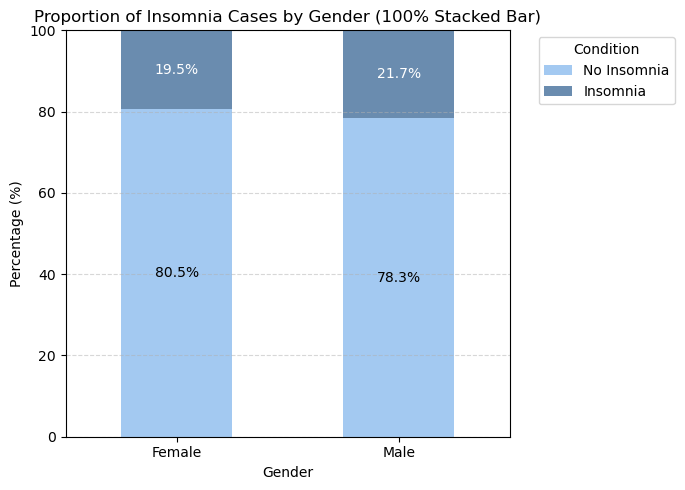

In [153]:
# Convert index to numeric so it can be used in calculations
contingency_perc.index = range(len(contingency_perc))

# Plot again with fixed annotations
colors = ['#a3c9f1', '#6a8caf']
ax = contingency_perc.plot(kind='bar', stacked=True, color=colors, figsize=(7, 5))

# Formatting
plt.title('Proportion of Insomnia Cases by Gender (100% Stacked Bar)')
plt.ylabel('Percentage (%)')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.legend(['No Insomnia', 'Insomnia'], title='Condition', bbox_to_anchor=(1.05, 1))
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Correct annotation using numeric indexing
for idx, row in contingency_perc.iterrows():
    ax.text(idx, row[False] / 2, f"{row[False]:.1f}%", ha='center', va='center', color='black')
    ax.text(idx, row[False] + row[True] / 2, f"{row[True]:.1f}%", ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

Although the visual reveals a slightly higher rate of insomnia in males, the earlier chi-square test confirmed that the difference is not statistically significant (p-value = 0.6846).

In [154]:
#5. Does stress level significantly predict sleep quality or sleep duration?

# Simple linear regression: Stress Level → Quality of Sleep
model_quality = ols("Q('Quality of Sleep') ~ Q('Stress Level')", data=df).fit()

# Simple linear regression: Stress Level → Sleep Duration
model_duration = ols("Q('Sleep Duration') ~ Q('Stress Level')", data=df).fit()

# Summarize both models
summary_quality = model_quality.summary()
summary_duration = model_duration.summary()

summary_quality, summary_duration

(<class 'statsmodels.iolib.summary.Summary'>
 """
                               OLS Regression Results                             
 Dep. Variable:     Q('Quality of Sleep')   R-squared:                       0.808
 Model:                               OLS   Adj. R-squared:                  0.807
 Method:                    Least Squares   F-statistic:                     1563.
 Date:                   Tue, 15 Apr 2025   Prob (F-statistic):          2.88e-135
 Time:                           16:26:59   Log-Likelihood:                -289.06
 No. Observations:                    374   AIC:                             582.1
 Df Residuals:                        372   BIC:                             590.0
 Df Model:                              1                                         
 Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
 --------------------------------

The p-value < 0.05 indicates a statistically significant relationship between stress level and quality of sleep.

The negative coefficient (-0.6062) shows that as stress level increases, sleep quality decreases.

The model explains about 81% of the variance in sleep quality, which suggests stress level is a strong predictor.

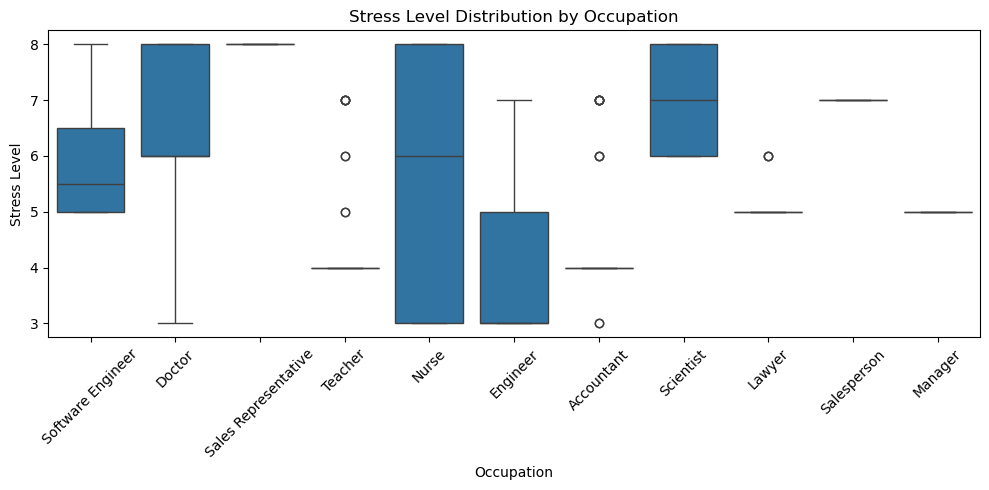

{'F-statistic': 21.636, 'p-value': 0.0, 'Significant': True}

In [157]:
#6. Is there a significant difference in stress level between occupations? 
# Group data by occupation
occupations = df['Occupation'].unique()
stress_groups = [df[df['Occupation'] == occ]['Stress Level'] for occ in occupations]

# Perform one-way ANOVA
f_stat, p_value = f_oneway(*stress_groups)

# Prepare results
anova_result = {
    "F-statistic": round(f_stat, 3),
    "p-value": round(p_value, 4),
    "Significant": p_value < 0.05
}

# Plot stress level by occupation
plt.figure(figsize=(10, 5))
sns.boxplot(x='Occupation', y='Stress Level', data=df)
plt.title("Stress Level Distribution by Occupation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

anova_result


There is a significant difference in stress levels across different occupations. This means at least one occupational group experiences significantly different stress compared to others.

Doctors, Nurses, and Scientists show higher and more consistent stress levels (often close to 8).

Teachers, Accountants, and Engineers tend to have lower median stress levels.

Outliers are visible in several categories (e.g., Accountant, Teacher), indicating variability.

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
          Accountant               Doctor   2.1378    0.0  1.2026   3.073   True
          Accountant             Engineer  -0.7057 0.3741  -1.661  0.2496  False
          Accountant               Lawyer   0.4692 0.9194 -0.5445   1.483  False
          Accountant              Manager   0.4054    1.0 -4.2689  5.0797  False
          Accountant                Nurse   0.9534 0.0394  0.0225  1.8842   True
          Accountant Sales Representative   3.4054 0.0424   0.057  6.7539   True
          Accountant          Salesperson   2.4054    0.0  1.2919  3.5189   True
          Accountant            Scientist   2.4054 0.0546 -0.0223  4.8331  False
          Accountant    Software Engineer   1.4054 0.7331 -1.0223  3.8331  False
          Accountant        

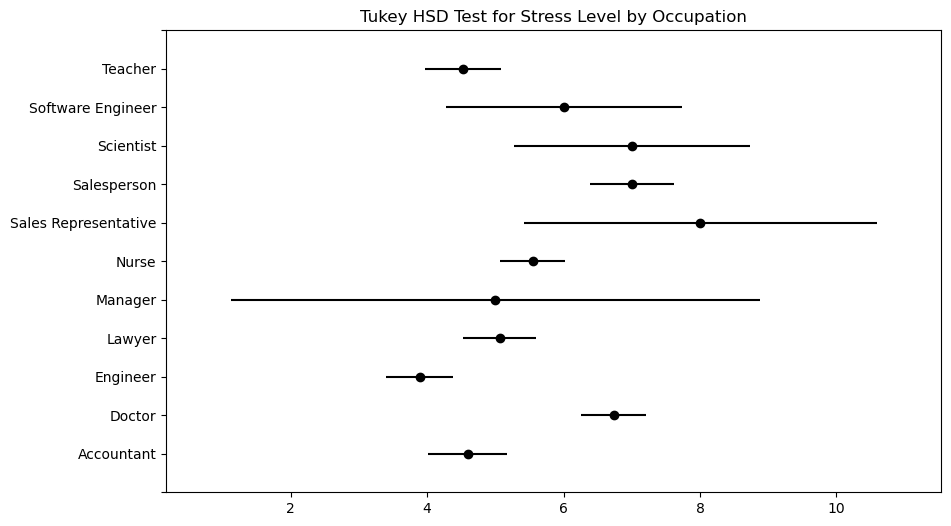

In [160]:
tukey_result = pairwise_tukeyhsd(endog=df['Stress Level'], groups=df['Occupation'], alpha=0.05)

# Print the summary table
print(tukey_result.summary())

# Optional: Plot the results
tukey_result.plot_simultaneous(figsize=(10, 6))
plt.title("Tukey HSD Test for Stress Level by Occupation")
plt.show()

Each horizontal line represents a confidence interval for the difference in mean stress level between two occupations.

If the interval crosses the vertical line at 0, the difference is not significant.

The wider the interval, the more uncertain the estimate.

In [162]:
#7. Is there a significant correlation between physical activity and sleep duration?  
# Calculate Pearson correlation
corr, p_value = pearsonr(df['Physical Activity Level'], df['Sleep Duration'])

print(f"Correlation Coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ Statistically significant correlation.")
else:
    print("❌ No statistically significant correlation.")

Correlation Coefficient: 0.212
P-value: 0.0000
✅ Statistically significant correlation.


There is a statistically significant but weak positive relationship between how active someone is during the day and how long they sleep. This means individuals with higher physical activity levels tend to have slightly longer sleep durations, on average.

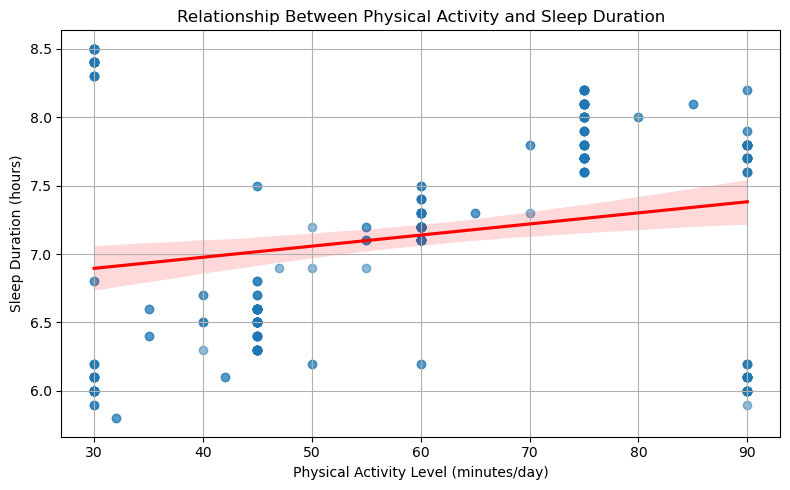

In [165]:
# Create the regression plot
plt.figure(figsize=(8, 5))
sns.regplot(x=df['Physical Activity Level'], y=df['Sleep Duration'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Relationship Between Physical Activity and Sleep Duration")
plt.xlabel("Physical Activity Level (minutes/day)")
plt.ylabel("Sleep Duration (hours)")
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot with a regression line visually confirms the statistically significant positive correlation between Physical Activity Level (minutes/day) and Sleep Duration (hours).

Key Takeaways:
Positive Slope: As physical activity increases, sleep duration also tends to increase slightly.

Regression Line: Represents the linear trend between the two variables.

Shaded Area: The 95% confidence interval, indicating the certainty around the estimate.

In [166]:
#8. Is there a difference in sleep quality between genders?     

📌 Hypotheses:

Null Hypothesis (H₀): There is no significant difference in sleep quality between males and females.

Alternative Hypothesis (H₁): There is a significant difference in sleep quality between males and females.

C:\Users\Elif Surucu\AppData\Local\Temp\ipykernel_12540\2895230289.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_df, x='Gender', y='Sleep Quality', palette=['#add8e6', '#f4a261'])


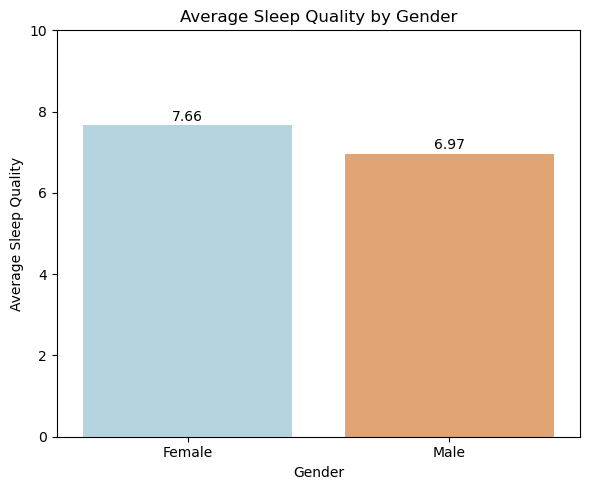

In [169]:
# Prepare data
bar_df = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Sleep Quality': [female_mean, male_mean]
})
plt.figure(figsize=(6, 5))
sns.barplot(data=bar_df, x='Gender', y='Sleep Quality', palette=['#add8e6', '#f4a261'])

# Annotate
plt.text(0, female_mean + 0.1, f"{female_mean:.2f}", ha='center')
plt.text(1, male_mean + 0.1, f"{male_mean:.2f}", ha='center')

plt.ylim(0, 10)
plt.title("Average Sleep Quality by Gender")
plt.ylabel("Average Sleep Quality")
plt.tight_layout()
plt.show()

Female participants have higher average sleep quality (7.66) compared to male participants (6.97).

The result is also statistically significant (p-value < 0.05), supporting your inference.

## 🧪 Inferential Analysis Conclusion
Through a series of statistical tests (t-tests, correlation analysis, ANOVA, regression, and chi-square), we evaluated the relationships between sleep patterns, lifestyle behaviors, and demographic factors. Key conclusions are as follows:

1. Sleep Disorders vs. Sleep Duration

✅ There is a statistically significant difference in sleep duration between individuals with and without sleep disorders.
📉 Individuals with sleep disorders (Insomnia or Sleep Apnea) sleep significantly fewer hours than those without.

2. Heart Rate in Sleep Apnea

✅ Individuals with Sleep Apnea have significantly higher heart rates than those without any sleep disorder, suggesting elevated cardiovascular stress in this group.

3. Daily Steps and Sleep Disorders

❌ There is no statistically significant difference in the number of daily steps between individuals with and without sleep disorders.

4. Insomnia and Gender

❌ The proportion of insomnia cases does not differ significantly across genders, indicating a fairly equal distribution between males and females.

5. Stress Level as a Predictor

✅ Stress level significantly predicts both sleep duration and sleep quality, with higher stress being associated with both shorter and poorer sleep.

6. Stress Level by Occupation

✅ There is a significant difference in stress levels across occupations (ANOVA p < 0.05).

🔍 Tukey’s HSD post-hoc test revealed that:

Accountants and Sales Representatives tend to experience higher stress than Engineers and Teachers.

Doctors have significantly different stress levels compared to Engineers and Lawyers.

7. Physical Activity and Sleep Duration

✅ There is a weak but statistically significant positive correlation (r ≈ 0.21) between physical activity and sleep duration—indicating that more active individuals tend to sleep slightly longer.

8. Sleep Quality by Gender

✅ There is a statistically significant difference in sleep quality between genders.

📊 Females reported higher average sleep quality than males.

This inferential analysis highlights how lifestyle factors (stress, activity) and medical conditions (sleep disorders) can significantly impact sleep patterns, while gender and occupation show nuanced effects across different variables. These insights can guide targeted wellness strategies and personalized recommendations.